In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)   #flattern 784cells
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)      #flattern 784cells
input_shape = (28, 28, 1)      #1--> grey scale image

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
#Encoding Digit MNIST Labels
from keras.utils import to_categorical     #0-9 10 classes

y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
x_train /= 255   #normalize the pixel value
x_test /= 255

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 40s 83ms/step - loss: 0.4135 - accuracy: 0.8716 - val_loss: 0.1117 - val_accuracy: 0.9653
Epoch 2/10
469/469 [==============================] - 41s 88ms/step - loss: 0.1209 - accuracy: 0.9651 - val_loss: 0.0754 - val_accuracy: 0.9765
Epoch 3/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0850 - accuracy: 0.9750 - val_loss: 0.0702 - val_accuracy: 0.9776
Epoch 4/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0687 - accuracy: 0.9800 - val_loss: 0.0512 - val_accuracy: 0.9837
Epoch 5/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0559 - accuracy: 0.9843 - val_loss: 0.0487 - val_accuracy: 0.9870
Epoch 6/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0510 - accuracy: 0.9850 - val_loss: 0.0426 - val_accuracy: 0.9869
Epoch 7/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.0530 - val_accuracy:

In [20]:
model.evaluate(x_test, y_test)                                         #test(public exam  0.06-->loss 0.98-->accuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.0502 - accuracy: 0.9855


[0.05021035671234131, 0.9854999780654907]

In [22]:
y_predict[0]

array([1.5784549e-08, 3.6645265e-06, 7.7852928e-06, 3.0869049e-07,
       3.2970817e-08, 1.5944124e-09, 3.4938236e-11, 9.9998760e-01,
       2.2204908e-08, 4.3738655e-07], dtype=float32)

In [23]:
import numpy as np

In [24]:
y_predicts=np.argmax(y_predict, axis=1)

In [25]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
y_predicts[0]                                                                         # (Predicted o/p)

7

In [27]:
y_predicts[1]

2

In [29]:
y_test_class=np.argmax(y_test, axis=1)

In [30]:
y_test_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
y_test_class[0]

7

In [32]:
y_test_class[1]

2

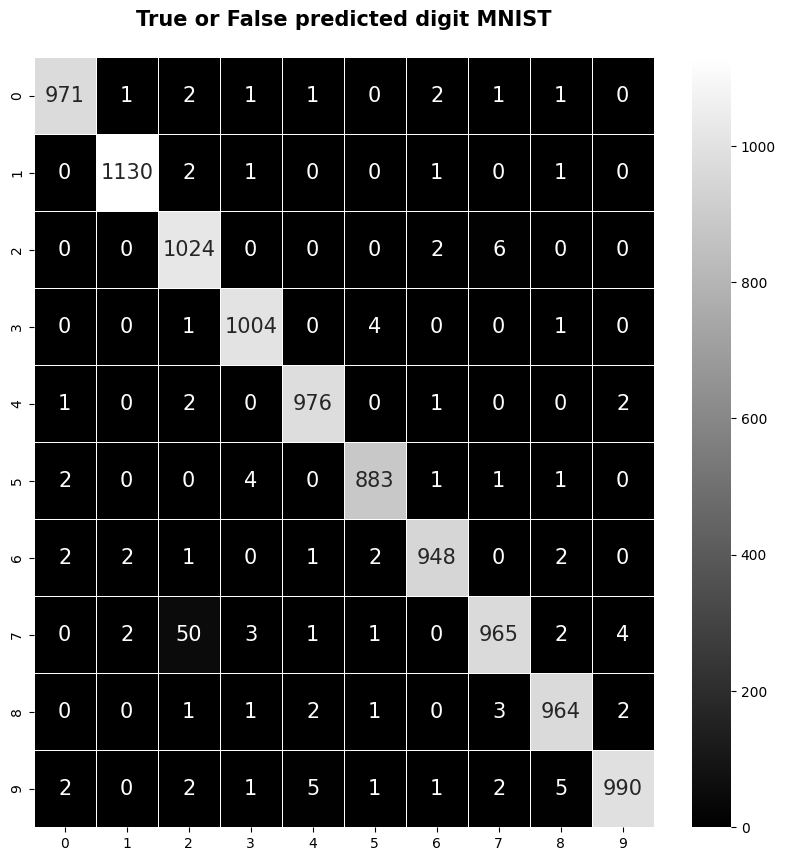

In [33]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_class,y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.94      0.99      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.94      0.96      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



1/1 [==============================] - 0s 279ms/step
6


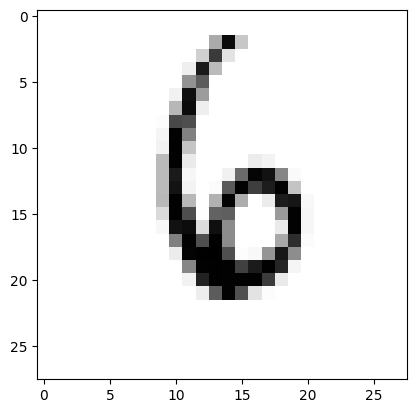

In [35]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())